# Feature Engineering

<!--BOOK_INFORMATION-->

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) | [Contents](Index.ipynb) | [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) >

numerical data in a tidy, ``[n_samples, n_features]`` format VS. Real world. 

**Feature engineering** taking whatever information you have about your problem and turning it into numbers that you can use to build your ``feature matrix``.

In this section, we will cover a few common examples of feature engineering tasks: 
- features for representing *categorical data*, 
- features for representing *text*, and 
- features for representing *images*.
- *derived features* for increasing model complexity
- *imputation* of missing data.

Often this process is known as *vectorization*
- as it involves converting arbitrary data into well-behaved vectors.

## Categorical Features

One common type of non-numerical data is *categorical* data.

Housing prices, 
- "price" and "rooms"
- "neighborhood" information.

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

You might be tempted to encode this data with a straightforward numerical mapping:

In [2]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};
# It turns out that this is not generally a useful approach

A fundamental assumption: numerical features reflect algebraic quantities.

- *Queen Anne < Fremont < Wallingford*
- *Wallingford - Queen Anne = Fremont*

It does not make much sense.

**One-hot encoding** (Dummy coding) effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.
- When your data comes as a list of dictionaries
    - Scikit-Learn's ``DictVectorizer`` will do this for you:

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int )
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

## Notice
- the 'neighborhood' column has been expanded into **three** separate columns (why not four?)
- representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood.

To see the meaning of each column, you can inspect the feature names:

In [4]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

There is one clear disadvantage of this approach: 
- if your category has many possible values, this can *greatly* increase the size of your dataset.
    - However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [5]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. 

two additional tools that Scikit-Learn includes to support this type of encoding:
- ``sklearn.preprocessing.OneHotEncoder``
- ``sklearn.feature_extraction.FeatureHasher`` 

## Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values.

Most automatic mining of social media data relies on some form of encoding the text as numbers.
- One of the simplest methods of encoding data is by *word counts*: 
    - you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:

In [6]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on.

While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's ``CountVectorizer``:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; 

it is easier to inspect if we convert this to a ``DataFrame`` with labeled columns:

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


Problem: The raw word counts put too much weight on words that appear very frequently.

*term frequency-inverse document frequency* (**TF–IDF**) weights the word counts by a measure of how often they appear in the documents.

The syntax for computing these features is similar to the previous example:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


For an example of using TF-IDF in a classification problem, see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb).

## Image Features
The simplest approach is what we used for the digits data in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb): **simply using the pixel values themselves**.
- But depending on the application, such approaches may not be optimal.
- A comprehensive summary of feature extraction techniques for images in the [Scikit-Image project](http://scikit-image.org).

For one example of using Scikit-Learn and Scikit-Image together, see [Feature Engineering: Working with Images](05.14-Image-Features.ipynb).

## Derived Features

Another useful type of feature is one that is mathematically derived from some input features.

We saw an example of this in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) when we constructed *polynomial features* from our input data.

To convert a linear regression into a polynomial regression 
- not by changing the model
- but by transforming the input!
    - *basis function regression*, and is explored further in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

For example, this data clearly cannot be well described by a straight line:

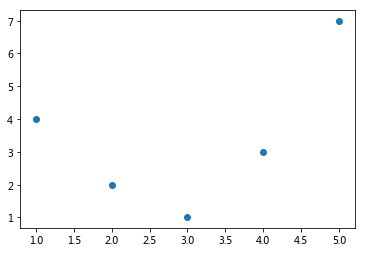

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

Still, we can fit a line to the data using ``LinearRegression`` and get the optimal result:

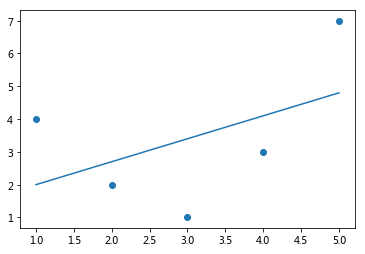

In [11]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

We need a more sophisticated model to describe the relationship between $x$ and $y$.
- One approach to this is to transform the data, 
    - adding extra columns of features to drive more flexibility in the model.

For example, we can add polynomial features to the data this way:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$.
Computing a linear regression on this expanded input gives a much closer fit to our data:

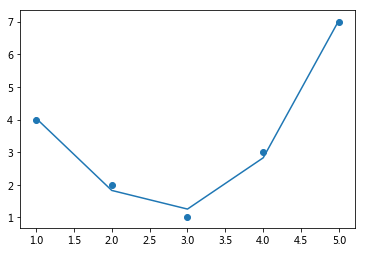

In [13]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

- We explore this idea further in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) in the context of *basis function regression*.

- More generally, this is one motivational path to the powerful set of techniques known as *kernel methods*, which we will explore in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb).

## Imputation of Missing Data

Another common need in feature engineering is handling of missing data.

- [Handling Missing Data](03.04-Missing-Values.ipynb)
    - ``NaN`` value is used to mark missing values.
    
For example, we might have a dataset that looks like this:

In [14]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.

This is known as *imputation* of missing values
- simple method, e.g., replacing missing values with the mean of the column
- sophisticated method, e.g., using matrix completion or a robust model to handle such data
    - It tends to be very application-specific, and we won't dive into them here.

For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the ``Imputer`` class:

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. 

This imputed data can then be fed directly into, for example, a ``LinearRegression`` estimator:

In [19]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps.

For example, we might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a ``Pipeline`` object, which can be used as follows:

In [21]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data.

In [22]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


All the steps of the model are applied automatically.

Notice that for the simplicity of this demonstration, we've applied the model to the data it was trained on; 
- this is why it was able to perfectly predict the result (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for further discussion of this).

For some examples of Scikit-Learn pipelines in action, see the following section on naive Bayes classification, as well as [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), and [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb).

<!--NAVIGATION-->
< [Hyperparameters and Model Validation](09.03-Hyperparameters-and-Model-Validation.ipynb) | [Contents](Index.ipynb) | [In Depth: Naive Bayes Classification](09.05-Naive-Bayes.ipynb) >